In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in d:\virtualenv\myenv\lib\site-packages (2.16.1)




[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11909518539229189558
xla_global_id: -1
]


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from config import Config
from utils import normalize

# Definitions

## Paths Declaration
Qui, di seguito, vengono riportati i path relativi al dataset di training, validation e testing. In particolare, il dataset di validation coincide con il primo dataset di testing contenuto nella cartella './LGHG2@n10C_to_25degC/Test'. Infatti, all'interno della directory './LGHG2@n10C_to_25degC/Test' sono presenti 5 possibili insiemi di dati così da poter essere sfruttati durante il testing.

In [7]:
config = Config(
    data_dir='./data',
    train_data_subdir='train/',
    val_data_subdir='test/',
    test_data_subdir='test/'
)

data_dir = ['test', 'train', 'val']
train_data_dir = ['TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.csv']
val_data_dir = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv', '04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']
test_data_dir = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv', '04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']


# Data Importing

In [8]:
train_data_filename = os.listdir(config.get_train_data_dir())[0]
train_data_path = os.path.join(config.get_train_data_dir(), train_data_filename)

train_data = pd.read_csv(train_data_path)
train_data

,V,I,Temp,V_avg,I_avg,SOC
0,0.385148,0.75102,0.303101,0.385148,0.75102,0.206417
1,0.385152,0.75102,0.304591,0.385150,0.75102,0.206417
2,0.385156,0.75102,0.306081,0.385152,0.75102,0.206417
3,0.385160,0.75102,0.307572,0.385154,0.75102,0.206417
4,0.385164,0.75102,0.309062,0.385156,0.75102,0.206417
...,...,...,...,...,...,...
669951,0.478843,0.75102,0.008477,0.459558,0.75102,0.283243
669952,0.478843,0.75102,0.008477,0.459699,0.75102,0.283243
669953,0.478843,0.75102,0.008477,0.459839,0.75102,0.283243
669954,0.478961,0.75102,0.008477,0.459979,0.75102,0.283243


In [9]:
train_data.columns

Index(['V', 'I', 'Temp', 'V_avg', 'I_avg', 'SOC'], dtype='object')

In [10]:
X_train = train_data[['V', 'I', 'Temp', 'V_avg', 'I_avg']].values
X_train.shape

(669956, 5)

In [11]:
X_train

array([[0.38514793, 0.75102009, 0.30310108, 0.38514793, 0.75102009],
       [0.38515183, 0.75102009, 0.30459129, 0.38514988, 0.75102009],
       [0.38515573, 0.75102009, 0.3060815 , 0.38515183, 0.75102009],
       ...,
       [0.47884278, 0.75102009, 0.00847709, 0.45983939, 0.75102009],
       [0.4789612 , 0.75102009, 0.00847709, 0.45997861, 0.75102009],
       [0.4789612 , 0.75102009, 0.00847709, 0.46011672, 0.75102009]])

In [12]:
y_train = train_data['SOC'].values
y_train.shape

(669956,)

In [13]:
y_train

array([0.20641667, 0.20641667, 0.20641667, ..., 0.28324333, 0.28324333,
       0.28324333])

In [14]:
val_data_filename = os.listdir(config.get_val_data_dir())[3]
val_data_path = os.path.join(config.get_val_data_dir(), val_data_filename)

val_data = pd.read_csv(val_data_path)
val_data

,V,I,Temp,V_avg,I_avg,SOC
0,0.966960,0.748900,0.920678,0.966960,0.748900,1.000000
1,0.966020,0.746992,0.920677,0.966490,0.747946,0.999990
2,0.965901,0.746992,0.917845,0.966294,0.747628,0.999983
3,0.965783,0.747098,0.917845,0.966166,0.747496,0.999973
4,0.965665,0.746992,0.917845,0.966066,0.747395,0.999963
...,...,...,...,...,...,...
47512,0.298614,0.751020,0.926344,0.292723,0.751020,0.136623
47513,0.298614,0.751020,0.926344,0.292761,0.751020,0.136623
47514,0.298614,0.751020,0.926344,0.292798,0.751020,0.136623
47515,0.298614,0.751020,0.929177,0.292834,0.751020,0.136623


In [15]:
X_val = val_data[['V', 'I', 'Temp', 'V_avg', 'I_avg']].values
y_val = val_data['SOC'].values

## Data Normalization

In [16]:
normalized_X_train = normalize(X_train)
normalized_X_train

array([[-0.63365322,  1.        , -1.        , -0.63365322,  1.        ],
       [-0.63908898,  1.        , -1.        , -0.63909772,  1.        ],
       [-0.64456116,  1.        , -1.        , -0.64457869,  1.        ],
       ...,
       [ 0.26690492,  1.        , -1.        ,  0.21572031,  1.        ],
       [ 0.26722387,  1.        , -1.        ,  0.21609528,  1.        ],
       [ 0.26722387,  1.        , -1.        ,  0.21646728,  1.        ]])

In [17]:
normalized_X_val = normalize(X_val)
normalized_X_val

array([[ 1.        , -1.        ,  0.57551079,  1.        , -1.        ],
       [ 0.99571585, -1.        ,  0.58256774,  1.        , -0.99130679],
       [ 0.99642139, -1.        ,  0.55815534,  1.        , -0.99419975],
       ...,
       [-0.98163938,  0.44653221,  1.        , -1.        ,  0.44653221],
       [-0.98183573,  0.44006032,  1.        , -1.        ,  0.44006032],
       [-0.98194943,  0.44002819,  1.        , -1.        ,  0.44002819]])

# FNN

## Training Parameters Declaration

In [18]:
no_features = 5  # Number of inputs features (variables: V, I, Temp, V_avg, I_avg)
no_responses = 1  # Number of outputs (SOC)
no_hidden_units = 55  # Number of optimal hidden units 'N', where each hidden unit for FNN represents a Neuron.

epochs = 2 # Number of epochs
no_training = 1 # Number of training execution
mini_batch_size = 32

## FNN Structure

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
from custom import CustomLeakyReLU, CustomClippedReLU

In [20]:
model = keras.Sequential([
    layers.Input(shape=(no_features,)),
    layers.Dense(
        no_hidden_units,
        activation=keras.activations.tanh
    ),
    layers.Dense(
        no_hidden_units,
        activation=CustomLeakyReLU(negative_slope=0.3)
    ), 
    layers.Dense(
        no_responses,
        activation=CustomClippedReLU()
    )
])


In [21]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20000,
    decay_rate=0.9
)

optimizer = keras.optimizers.SGD(
    learning_rate=lr_schedule
)

In [22]:
model.compile(
    optimizer=optimizer,
    loss='mse'
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 55)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 55)                  │           3,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,466 (13.54 KB)

 Trainable params: 3,466 (13.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
for t in range(no_training):
    print(f'Start of the new training session...')
    print(f'Training session {t+1}/{no_training}')
    history = model.fit(
        x=normalized_X_train,
        y=y_train,
        epochs=epochs,
        batch_size=mini_batch_size,
        validation_data=(
            normalized_X_val, 
            y_val
        ),
        verbose=1
    )
    print('\n')

Start of the new training session...
Training session 1/1
Epoch 1/2
20937/20937 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.0110 - val_loss: 0.0028
Epoch 2/2
20937/20937 ━━━━━━━━━━━━━━━━━━━━ 20s 965us/step - loss: 0.0031 - val_loss: 0.0022




# Model Saving

In [25]:
model_path = './models/dl/soc_estimation_dl.keras'
model.save(model_path)

In [26]:
loaded_model = keras.models.load_model(
    model_path, 
    custom_objects={
        'CustomLeakyReLU': CustomLeakyReLU,
        'CustomClippedReLU': CustomClippedReLU
    }
)


# Model History

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
0,0.005576,0.002767,0
1,0.003017,0.002177,1


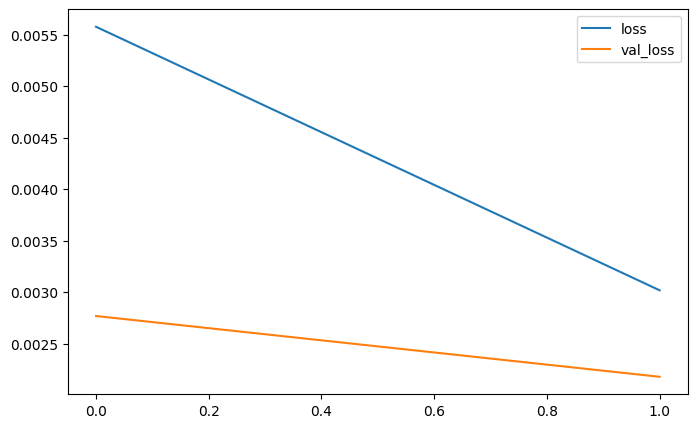

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show() 